## 기본 세팅

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/sha

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [3]:
import pandas as pd
import seaborn as sns

## 2024 희귀질환 리스트 / 인사이트 도출 어려움

In [4]:
df_classf_code= pd.read_csv('../csv/2024년 희귀질환자 의료비 지원사업 대상질환 - 분류코드기준_정리.csv')
df_classf_code

,상병코드,24년 국문 질환명,24년 영문 질환명,신규여부,산정특례 종류,산정특례\n특정기호
0,A31.9,"비정형마이코박테륨증, 가족형, X연관","Atypical mycobacteriosis, familial, x-linked",NaN,극희귀,V900
1,A81.0,아급성 해면모양뇌병증,Subacute spongiform encephalopathy,NaN,희귀,V102
2,A81.0,크로이츠펠트-야콥병,Creutzfeldt-Jakob disease,NaN,희귀,V102
3,"D12.6, M8220/0",가족성선종성폴립증,Familial adenomatous polyposis,NaN,희귀,V281
4,D55.0,G6PD결핍빈혈,G6PD deficiency anaemia,NaN,희귀,V163
...,...,...,...,...,...,...
1243,코드없음,20번 염색체 단완의 결손 증후군,20p deletion syndrome,신규,염색체,V901
1244,코드없음,20번 염색체 장완의 말단부 삼염색체증,Distal trisomy 20q,NaN,염색체,V901
1245,코드없음,21번 염색체 장완의 결손 증후군,21q deletion syndrome,신규,염색체,V901
1246,코드없음,22번 염색체 장완의 결손 증후군,22q deletion syndrome,NaN,염색체,V901


In [5]:
df_filtered = df_classf_code[df_classf_code['상병코드'] == '코드없음']
df_filtered['산정특례 종류'].unique()

array(['극희귀', '염색체'], dtype=object)

In [6]:
df_classf_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   상병코드        1248 non-null   object
 1   24년 국문 질환명  1248 non-null   object
 2   24년 영문 질환명  1248 non-null   object
 3   신규여부        83 non-null     object
 4   산정특례 종류     1248 non-null   object
 5   산정특례
특정기호   1248 non-null   object
dtypes: object(6)
memory usage: 58.6+ KB


In [7]:
df_classf_code['산정특례 종류'].value_counts()

산정특례 종류
희귀     797
극희귀    345
염색체    106
Name: count, dtype: int64

In [8]:
df_classf_code['산정특례 종류'].value_counts(normalize=True)

산정특례 종류
희귀     0.638622
극희귀    0.276442
염색체    0.084936
Name: proportion, dtype: float64

In [9]:
df_classf_code_filtered = df_classf_code.loc[df_classf_code['산정특례 종류'] == '희귀']
df_classf_code_filtered[['상병코드', '24년 국문 질환명', '산정특례\n특정기호']].value_counts()

상병코드             24년 국문 질환명     산정특례\n특정기호
Q99.2            취약X증후군         V245          1
A81.0            아급성 해면모양뇌병증    V102          1
                 크로이츠펠트-야콥병     V102          1
D12.6,  M8220/0  가족성선종성폴립증      V281          1
D55.0            G6PD결핍빈혈       V163          1
                                             ..
D61.9            골수형성저하         V023          1
                 범골수황폐          V023          1
                 저형성빈혈 NOS      V023          1
D64.4            선천성 적혈구조혈이상빈혈  V220          1
                 이상조혈성 빈혈(선천성)  V220          1
Name: count, Length: 797, dtype: int64

<Axes: xlabel='24년 국문 질환명', ylabel='count'>

/usr/local/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8192 (\N{EN QUAD}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8192 (\N{EN QUAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


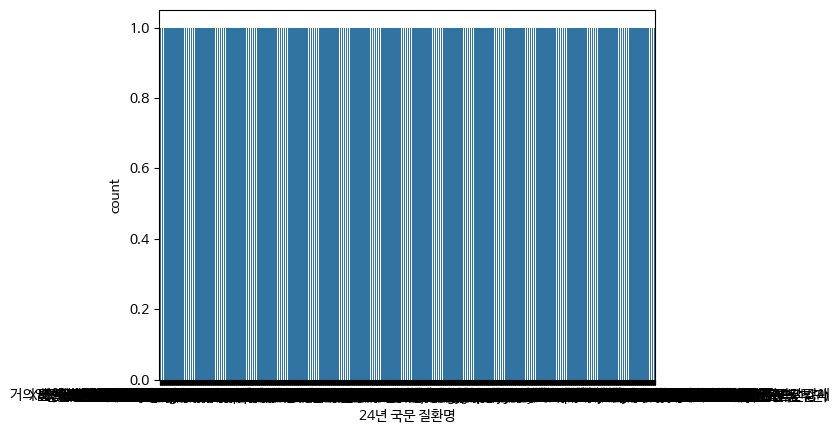

In [10]:
# 범주형 데이터 개수 확인
sns.countplot(x='24년 국문 질환명', data=df_classf_code)                                                                                                                                                  

## 2021 희귀질환 리스트

In [11]:
df_rare_2021 = pd.read_csv('../csv/2021_질병분류코드별_진료내역_항목별_요양급여비용_현황.csv')

In [12]:
df_rare_2021

,질환분류,질환코드,질환명,계,진찰료,입원료,투약료,주사료,마취료,이학요법료,정신요법료,처치 및 수술료,검사료,영상 및 방사선 치료료,기타
0,계,소계,NaN,317789679,63604106,48547544,6489961,69347268,1024116,13417865,129127,22622419,46850108,4686879,41070288
1,희귀질환,소계,NaN,308572698,62306518,46864613,6321592,67957685,982444,12554025,116157,21761403,45152854,4559229,39996179
2,희귀질환,A81.0,크로이츠펠트-야콥병,1624857,73975,273196,29930,124240,1114,107553,20,134960,156167,7086,716615
3,희귀질환,D12.6,M8220/0 가족성선종성폴립증,322142,25918,51745,3271,16059,10331,70,240,114390,52848,3312,43957
4,희귀질환,D55.0,G6PD결핍빈혈,177,49,-,-,-,-,-,-,-,128,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,기타염색체이상질환,Q93.5,16번 염색체 단완의 결손,326,271,55,-,-,-,-,-,-,-,-,-
722,기타염색체이상질환,Q93.2,18번 고리모양 염색체,492,211,93,-,-,-,-,30,-,157,-,-
723,기타염색체이상질환,Q92.7,18번 염색체 단완의 사염색체증,7104,903,159,7,-,-,1341,-,28,4466,181,18
724,기타염색체이상질환,Q99.8,X 염색체장완의 28부분의 중복 증후군,5423,547,17,-,-,-,4462,-,-,398,-,-


In [13]:
df_rare_2021.iloc[624].loc['질환명']

'1형: Q51.0 Q52.0 2형: Q51.0 Q52.0 동반기형 마이어 로키탄스키 쿠스터 하우저 증후군'

In [14]:
df_rare_2021[:100]

,질환분류,질환코드,질환명,계,진찰료,입원료,투약료,주사료,마취료,이학요법료,정신요법료,처치 및 수술료,검사료,영상 및 방사선 치료료,기타
0,계,소계,NaN,317789679,63604106,48547544,6489961,69347268,1024116,13417865,129127,22622419,46850108,4686879,41070288
1,희귀질환,소계,NaN,308572698,62306518,46864613,6321592,67957685,982444,12554025,116157,21761403,45152854,4559229,39996179
2,희귀질환,A81.0,크로이츠펠트-야콥병,1624857,73975,273196,29930,124240,1114,107553,20,134960,156167,7086,716615
3,희귀질환,D12.6,M8220/0 가족성선종성폴립증,322142,25918,51745,3271,16059,10331,70,240,114390,52848,3312,43957
4,희귀질환,D55.0,G6PD결핍빈혈,177,49,-,-,-,-,-,-,-,128,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,희귀질환,E25.0,효소결핍과 관련된 선천성 부신생식기장애,28735,5574,4488,465,2757,467,-,-,2305,9578,136,2964
96,희귀질환,E25.9,부신생식기증후군 NOS,2209,1327,155,-,21,-,-,-,-,680,20,5
97,희귀질환,E26.8,바터증후군,2193,462,-,722,-,-,-,-,-,863,-,146
98,희귀질환,E27.1,애디슨병,11905,4088,1675,153,1065,-,-,-,2,3995,193,734


In [15]:
df_rare_2021['질환코드'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 726 entries, 0 to 725
Series name: 질환코드
Non-Null Count  Dtype 
--------------  ----- 
701 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [16]:
df_rare_2021['질환코드'].unique()

array(['소계', 'A81.0', 'D12.6', 'D55.0', 'D55.2', 'D56.0', 'D56.1',
       'D56.2', 'D56.3', 'D56.4', 'D59.3', 'D59.5', 'D60.0', 'D61.0',
       'D61.3', 'D61.9', 'D66', 'D67', 'D68.0', 'D68.1', 'D68.2', 'D68.6',
       'D69.1', 'D69.3', 'D70', 'D71', 'D76.1', 'D76.3', 'D80.0', 'D80.1',
       'D80.2', 'D80.3', 'D80.4', 'D80.6', 'D81.2', 'D81.8', 'D81.9',
       'D82.0', 'D82.1', 'D82.3', 'D82.4', 'D83.0', 'D84.1', 'D86.0',
       'D86.1', 'D86.2', 'D86.3', 'D86.8', 'D89.1', 'E22.0', 'E23.0',
       'E24.0', 'E24.3', 'E25.0', 'E25.9', 'E26.8', 'E27.1', 'E27.2',
       'E27.4', 'E34.8', 'E55.0', 'E70.0', 'E70.1', 'E70.2', 'E70.3',
       'E71.0', 'E71.1', 'E71.3', 'E72.0', 'E72.1', 'E72.2', 'E72.3',
       'E72.4', 'E72.5', 'E74.0', 'E74.2', 'E74.4', 'E74.8', 'E75.1',
       'E75.2', 'E75.4', 'E75.5', 'E76.0', 'E76.1', 'E76.2', 'E77.1',
       'E79.1', 'E80.2', 'E83.0', 'E83.1', 'E83.3', 'E84.0', 'E84.1',
       'E85.0', 'E85.1', 'E85.2', 'E85.4', 'F01.1', 'F80.3', 'F84.2',
       'G10',

In [17]:
df_rare_2021['질환코드'].describe()

count       701
unique      391
top       Q93.5
freq         37
Name: 질환코드, dtype: object

In [18]:
df_rare_2021_value_counts = df_rare_2021['질환분류'].value_counts()
df_rare_2021_value_counts

질환분류
희귀질환         509
극희귀질환        182
기타염색체이상질환     34
계              1
Name: count, dtype: int64

In [19]:
# '질환분류' 모든 값의 총 개수
df_rare_2021_total_counts = len(df_rare_2021['질환분류'])
df_rare_2021_total_counts

726

In [20]:
# 각 질환분류별 분포도(%)
df_rare_2021_population_accural = ((df_rare_2021_value_counts / df_rare_2021_total_counts) * 100).round(2)
df_rare_2021_population_accural

질환분류
희귀질환         70.11
극희귀질환        25.07
기타염색체이상질환     4.68
계             0.14
Name: count, dtype: float64

### 희귀질환(내분비,영향 / 정신및행동 / 신경계통)

In [21]:
# 질환분류 - '희귀질환'만 추출(509개)
df_rare_2021_filtered = df_rare_2021.loc[df_rare_2021['질환분류'] == '희귀질환']
df_rare_2021_filtered.info()
# df_rare_2021_filtered[['상병코드', '24년 국문 질환명', '산정특례\n특정기호']].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 509 entries, 1 to 509
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   질환분류          509 non-null    object
 1   질환코드          509 non-null    object
 2   질환명           508 non-null    object
 3   계             509 non-null    int64 
 4   진찰료           509 non-null    int64 
 5   입원료           509 non-null    object
 6   투약료           509 non-null    object
 7   주사료           509 non-null    object
 8   마취료           509 non-null    object
 9   이학요법료         509 non-null    object
 10  정신요법료         509 non-null    object
 11  처치 및 수술료      509 non-null    object
 12  검사료           509 non-null    object
 13  영상 및 방사선 치료료  509 non-null    object
 14  기타            509 non-null    object
dtypes: int64(2), object(13)
memory usage: 63.6+ KB


In [22]:
# '질환코드' 열에서 'E' 또는 'F'로 시작하는 행 필터링
df_rare_2021_filtered_letter = df_rare_2021_filtered[df_rare_2021_filtered['질환코드'].str.startswith(('E', 'F'), na=False)]
df_rare_2021_filtered_letter
# E = 내분비,영양 / F =  정신및행동

,질환분류,질환코드,질환명,계,진찰료,입원료,투약료,주사료,마취료,이학요법료,정신요법료,처치 및 수술료,검사료,영상 및 방사선 치료료,기타
84,희귀질환,E22.0,말단비대증 및 뇌하수체거인증,527301,30928,19952,2206,339455,5923,32,-,32777,53372,8626,34029
85,희귀질환,E22.0,성장호르몬의 과잉생산,23707,786,123,144,19540,-,-,-,521,1613,38,943
86,희귀질환,E23.0,쉬한증후군,171436,37359,19547,13998,20927,197,26,-,5864,24917,1069,47532
87,희귀질환,E23.0,콜만증후군,11849,4916,613,-,2435,-,-,-,-,3002,33,850
88,희귀질환,E24.0,뇌하수체 부신피질자극호르몬의 과다생산,148746,21370,19932,1509,4023,5277,12,103,30777,35860,8618,21266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,희귀질환,E85.4,국소적 아밀로이드증,465450,149430,66763,3577,85480,1327,87,209,54969,82893,6420,14292
182,희귀질환,E85.4,기관한정아밀로이드증,1460778,360623,260377,74387,103987,3041,68086,226,136608,267529,25055,160859
183,희귀질환,F01.1,카다실,913105,253119,156289,15922,14823,1283,124979,380,14372,46068,1702,284166
184,희귀질환,F80.3,뇌전증에 동반된 후천성 실어증(失語症)[란다우-클레프너],35591,1170,284,1,23,-,-,-,1,3070,38,31005


In [23]:
# '질환코드'와 '질환명' 열을 기준으로 내림차순 정렬
df_rare_2021_filtered_letter_sorted = df_rare_2021_filtered_letter.sort_values(by=['질환코드', '질환명'], ascending=False)
df_rare_2021_filtered_letter_sorted

,질환분류,질환코드,질환명,계,진찰료,입원료,투약료,주사료,마취료,이학요법료,정신요법료,처치 및 수술료,검사료,영상 및 방사선 치료료,기타
185,희귀질환,F84.2,레트증후군,62466,12143,752,359,8,-,34679,317,1344,11668,310,887
184,희귀질환,F80.3,뇌전증에 동반된 후천성 실어증(失語症)[란다우-클레프너],35591,1170,284,1,23,-,-,-,1,3070,38,31005
183,희귀질환,F01.1,카다실,913105,253119,156289,15922,14823,1283,124979,380,14372,46068,1702,284166
182,희귀질환,E85.4,기관한정아밀로이드증,1460778,360623,260377,74387,103987,3041,68086,226,136608,267529,25055,160859
181,희귀질환,E85.4,국소적 아밀로이드증,465450,149430,66763,3577,85480,1327,87,209,54969,82893,6420,14292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,희귀질환,E24.0,뇌하수체 부신피질자극호르몬의 과다생산,148746,21370,19932,1509,4023,5277,12,103,30777,35860,8618,21266
87,희귀질환,E23.0,콜만증후군,11849,4916,613,-,2435,-,-,-,-,3002,33,850
86,희귀질환,E23.0,쉬한증후군,171436,37359,19547,13998,20927,197,26,-,5864,24917,1069,47532
85,희귀질환,E22.0,성장호르몬의 과잉생산,23707,786,123,144,19540,-,-,-,521,1613,38,943


In [24]:
df_rare_2021_filtered_letter.info()
# 질환코드 기준
# 내분비,영양 99개 / 정신및행동 3개

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 84 to 185
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   질환분류          102 non-null    object
 1   질환코드          102 non-null    object
 2   질환명           102 non-null    object
 3   계             102 non-null    int64 
 4   진찰료           102 non-null    int64 
 5   입원료           102 non-null    object
 6   투약료           102 non-null    object
 7   주사료           102 non-null    object
 8   마취료           102 non-null    object
 9   이학요법료         102 non-null    object
 10  정신요법료         102 non-null    object
 11  처치 및 수술료      102 non-null    object
 12  검사료           102 non-null    object
 13  영상 및 방사선 치료료  102 non-null    object
 14  기타            102 non-null    object
dtypes: int64(2), object(13)
memory usage: 12.8+ KB


In [25]:
# '질환코드' 열에서 'G'로 시작하는 행 필터링 
df_rare_2021_filtered_letter_G = df_rare_2021_filtered[df_rare_2021_filtered['질환코드'].str.startswith('G', na=False)]
df_rare_2021_filtered_letter_G
# G = 신경계통

,질환분류,질환코드,질환명,계,진찰료,입원료,투약료,주사료,마취료,이학요법료,정신요법료,처치 및 수술료,검사료,영상 및 방사선 치료료,기타
186,희귀질환,G10,헌팅톤무도병,12075,7356,609,945,56,-,-,-,22,1615,-,1471
187,희귀질환,G10,헌팅톤병,152735,34986,10834,9681,206,-,14098,180,112,3534,35,79068
188,희귀질환,G11.1,X-연관 열성 척수소뇌성 운동실조,26935,6871,1249,19,67,-,6422,-,-,6337,59,5911
189,희귀질환,G11.1,보류된 힘줄반사을(를) 동반한 조기발병 소뇌성 운동실조,491,92,-,-,-,-,-,-,-,399,-,-
190,희귀질환,G11.1,본태성 떨림을(를) 동반한 조기발병 소뇌성 운동실조,6508,1725,1632,69,109,-,-,-,29,1937,18,989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,희귀질환,G72.3,주기마비(가족성) 저칼륨혈성,3130,564,653,36,15,-,-,-,2,1545,13,301
259,희귀질환,G73.1,람베르트-이튼증후군(C00-D48†),62820,5987,20481,568,6507,64,38,-,6605,13715,780,8076
260,희귀질환,G90.5,복합부위통증증후군 I형,4069473,484457,942333,158752,122814,89990,966292,5614,228268,189641,43613,837698
261,희귀질환,G90.6,복합부위통증증후군 II형,653635,169929,97587,33355,32150,56356,24673,1086,143884,28701,9362,56552


In [26]:
df_rare_2021_filtered_letter_G.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 186 to 262
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   질환분류          77 non-null     object
 1   질환코드          77 non-null     object
 2   질환명           77 non-null     object
 3   계             77 non-null     int64 
 4   진찰료           77 non-null     int64 
 5   입원료           77 non-null     object
 6   투약료           77 non-null     object
 7   주사료           77 non-null     object
 8   마취료           77 non-null     object
 9   이학요법료         77 non-null     object
 10  정신요법료         77 non-null     object
 11  처치 및 수술료      77 non-null     object
 12  검사료           77 non-null     object
 13  영상 및 방사선 치료료  77 non-null     object
 14  기타            77 non-null     object
dtypes: int64(2), object(13)
memory usage: 9.6+ KB


### 극희귀질환(내분비,영향 / 정신및행동 / 신경계통)

In [27]:
# 질환분류 - '극희귀질환'만 추출(182개)
df_rare_2021_filtered_Extreme = df_rare_2021.loc[df_rare_2021['질환분류'] == '극희귀질환']
df_rare_2021_filtered_Extreme.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 510 to 691
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   질환분류          182 non-null    object
 1   질환코드          157 non-null    object
 2   질환명           181 non-null    object
 3   계             182 non-null    int64 
 4   진찰료           182 non-null    int64 
 5   입원료           182 non-null    object
 6   투약료           182 non-null    object
 7   주사료           182 non-null    object
 8   마취료           182 non-null    object
 9   이학요법료         182 non-null    object
 10  정신요법료         182 non-null    object
 11  처치 및 수술료      182 non-null    object
 12  검사료           182 non-null    object
 13  영상 및 방사선 치료료  182 non-null    object
 14  기타            182 non-null    object
dtypes: int64(2), object(13)
memory usage: 22.8+ KB


In [28]:
# '질환코드' 열에서 'E' 또는 'F'로 시작하는 행 필터링
df_rare_2021_filtered_Extreme_letter = df_rare_2021_filtered_Extreme[df_rare_2021_filtered_Extreme['질환코드'].str.startswith(('E', 'F'), na=False)]
df_rare_2021_filtered_Extreme_letter
# E = 내분비,영양 / F =  정신및행동

,질환분류,질환코드,질환명,계,진찰료,입원료,투약료,주사료,마취료,이학요법료,정신요법료,처치 및 수술료,검사료,영상 및 방사선 치료료,기타
515,극희귀질환,E16.10,선천성 고인슐린혈증,6946,4705,162,0,-,-,-,-,9,1835,75,161
516,극희귀질환,E20.1,거짓 부갑상선기능저하증,8635,4246,732,10,18,-,-,-,42,2893,133,561
517,극희귀질환,E72.8,숙신알데히드 탈수소효소 결핍(증),8379,813,1880,0,-,-,4827,-,-,205,15,639
518,극희귀질환,E75.2,펠리제우스-메르츠바하병,11687,1756,130,4,-,-,9479,15,-,280,23,0
519,극희귀질환,E83.1+,특발성 폐 헤모시데린증(J99.8*),746,372,114,-,-,-,-,-,-,161,86,13
520,극희귀질환,E88.1,선천성 전신지방디스트로피,262,145,39,0,-,-,1,-,-,77,-,-
614,극희귀질환,E74.0,다논 병,3598,1783,143,17,7,-,1,-,4,1219,14,409
616,극희귀질환,E78.0,동형접합 가족성 고콜레스테롤혈증,5725,1598,227,1,3377,-,-,133,-,389,-,-
622,극희귀질환,E66.2,E23.3 로하드 증후군,4601,1524,303,248,1305,18,61,-,10,1096,34,1
638,극희귀질환,E20.8,H90.3-H90.5 사례별 동반 신장질환 부갑상선기능저하증-감각신경성 난청- 신장...,2311,921,252,0,16,-,3,-,15,1093,9,0


In [29]:
df_rare_2021_filtered_Extreme_letter.info()
# 질환코드 기준
# 내분비,영양 18개 / 정신및행동 0개

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 515 to 687
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   질환분류          18 non-null     object
 1   질환코드          18 non-null     object
 2   질환명           18 non-null     object
 3   계             18 non-null     int64 
 4   진찰료           18 non-null     int64 
 5   입원료           18 non-null     object
 6   투약료           18 non-null     object
 7   주사료           18 non-null     object
 8   마취료           18 non-null     object
 9   이학요법료         18 non-null     object
 10  정신요법료         18 non-null     object
 11  처치 및 수술료      18 non-null     object
 12  검사료           18 non-null     object
 13  영상 및 방사선 치료료  18 non-null     object
 14  기타            18 non-null     object
dtypes: int64(2), object(13)
memory usage: 2.2+ KB


In [30]:
# '질환코드' 열에서 'G'로 시작하는 행 필터링
df_rare_2021_filtered_Extreme_letter_G = df_rare_2021_filtered_Extreme[df_rare_2021_filtered_Extreme['질환코드'].str.startswith('G', na=False)]
df_rare_2021_filtered_Extreme_letter_G
# G = 신경계통

,질환분류,질환코드,질환명,계,진찰료,입원료,투약료,주사료,마취료,이학요법료,정신요법료,처치 및 수술료,검사료,영상 및 방사선 치료료,기타
521,극희귀질환,G04.8,라스무센 뇌염,59693,5044,11913,700,7413,17,483,-,4505,18677,2074,8867
522,극희귀질환,G04.8,자가면역 뇌염,4972339,368240,1236713,112378,1086113,11296,314833,6029,416787,851594,52856,515501
523,극희귀질환,G23.8,파르병,18126,3148,611,449,384,0,11249,-,7,761,7,1510
524,극희귀질환,G24.8,돌발성 운동유발 이상운동,8162,5489,938,5,6,84,37,-,-,508,12,1083
525,극희귀질환,G25.8,강직인간증후군,2137,1450,164,-,-,-,-,-,-,473,50,-
526,극희귀질환,G47.31,하다드 증후군,390,173,-,8,-,-,-,-,127,70,10,2
527,극희귀질환,G51.8,파리-롬버르그증후군,3821,1306,344,30,201,529,-,-,944,50,21,396
528,극희귀질환,G72.4,봉입체 근염,56021,10833,17940,905,7746,415,2027,-,4680,6611,454,4410
529,극희귀질환,G93.4,포도당 수송자 1 결핍증,9074,3183,119,403,-,-,2882,65,-,2223,18,181
586,극희귀질환,G24.1,ADCY5 관련 이상운동증,7207,1596,228,259,671,-,3485,543,-,400,24,-


In [31]:
df_rare_2021_filtered_Extreme_letter_G.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 521 to 672
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   질환분류          18 non-null     object
 1   질환코드          18 non-null     object
 2   질환명           18 non-null     object
 3   계             18 non-null     int64 
 4   진찰료           18 non-null     int64 
 5   입원료           18 non-null     object
 6   투약료           18 non-null     object
 7   주사료           18 non-null     object
 8   마취료           18 non-null     object
 9   이학요법료         18 non-null     object
 10  정신요법료         18 non-null     object
 11  처치 및 수술료      18 non-null     object
 12  검사료           18 non-null     object
 13  영상 및 방사선 치료료  18 non-null     object
 14  기타            18 non-null     object
dtypes: int64(2), object(13)
memory usage: 2.2+ KB


### 내분비,영양 / 정신및행동 / 신경계통 - 질환 분류에 따른 개수확인
1. 희귀질환
   1) 내분비,영양(E코드) : 99개
   2) 정신및행동(F코드) : 3개
   3) 신경계통(G코드) : 77개
2. 극희귀질환
   1) 내분비,영양(E코드) : 18개
   2) 정신및행동(F코드) : 0개
   3) 신경계통(G코드) : 18개

In [32]:
# 희귀질환, 극희귀질환 전체 개수(691)
df_rare_2021 = df_rare_2021[df_rare_2021['질환분류'].isin(['희귀질환', '극희귀질환'])]
df_rare_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 1 to 691
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   질환분류          691 non-null    object
 1   질환코드          666 non-null    object
 2   질환명           689 non-null    object
 3   계             691 non-null    int64 
 4   진찰료           691 non-null    int64 
 5   입원료           691 non-null    object
 6   투약료           691 non-null    object
 7   주사료           691 non-null    object
 8   마취료           691 non-null    object
 9   이학요법료         691 non-null    object
 10  정신요법료         691 non-null    object
 11  처치 및 수술료      691 non-null    object
 12  검사료           691 non-null    object
 13  영상 및 방사선 치료료  691 non-null    object
 14  기타            691 non-null    object
dtypes: int64(2), object(13)
memory usage: 86.4+ KB


In [33]:
# 최대 행수와 최대 열수 보여주기
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [34]:
if df_rare_2021 is not None:
    print(df_rare_2021.head(20))
else:
    print("DataFrame이 존재하지 않습니다.")

    질환분류   질환코드                     질환명          계       진찰료       입원료  \
1   희귀질환     소계                     NaN  308572698  62306518  46864613   
2   희귀질환  A81.0              크로이츠펠트-야콥병    1624857     73975    273196   
3   희귀질환  D12.6       M8220/0 가족성선종성폴립증     322142     25918     51745   
4   희귀질환  D55.0                G6PD결핍빈혈        177        49         -   
5   희귀질환  D55.0  포도당-6-인산탈수소효소결핍에 의한 빈혈         25        25         -   
6   희귀질환  D55.2          피루브산염카이네이스결핍빈혈       5377      4131        87   
7   희귀질환  D55.2         해당효소의 장애에 의한 빈혈       2463       504        44   
8   희귀질환  D56.0                 알파지중해빈혈       1300       388        18   
9   희귀질환  D56.1                 베타지중해빈혈      50499     21374      9487   
10  희귀질환  D56.2              델타-베타지중해빈혈        110        66         -   
11  희귀질환  D56.3                지중해빈혈 소질       7589      5096       164   
12  희귀질환  D56.4         태아헤모글로빈의 유전적 존속       1196       302        29   
13  희귀질환  D59.3            비정형 용혈-요독증후

In [35]:
def codes(x):
    condition = (df_rare_2021["질환코드"] == x[0]) &\
           (float(x[1:]) >= df_rare_2021["코드시작"].astype(float)) &\
           (float(x[1:]) <= df_rare_2021["코드끝"].astype(float))
    result = df_rare_2021.loc[condition, '항목분류']
    if len(result) > 0:
        return result.iloc[0]
    else:
        return None  # 여기서 None 대신 원하는 기본값을 사용하십시오.



# '신경계통(G)', '내분비,영양(E)', '정신및행동(F)'에 대한 "희귀질환" / "극희귀질환" 분류별 분포 및 환자 수 확인

In [36]:
df_region = pd.read_csv('../csv/2021_지역별_질병분류코드별_발생자수.csv')  # 지역별
df_region

,질병코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음
0,계,NaN,43079,8601,2446,11377,1274,1752,1291,1080,238,2431,2243,2762,2120,789,1501,1392,1076,690,16
1,D61.3,특발성 무형성빈혈,406,73,29,101,20,17,9,12,3,24,19,15,22,6,6,20,20,9,1
2,D61.9,저형성빈혈 NOS,223,47,34,56,4,9,2,1,2,21,7,15,11,4,6,2,1,1,0
3,D68.6,항인지질증후군,469,126,27,121,12,20,3,10,1,11,30,13,37,4,13,13,14,14,0
4,D86.0,폐의 사르코이드증,319,79,24,96,5,14,10,4,1,11,12,15,13,5,6,12,9,3,0
5,E27.4,부신피질부전 NOS,618,75,81,90,9,67,15,16,3,42,48,56,27,35,15,18,10,11,0
6,F01.1,카다실,276,43,6,43,2,7,1,4,4,8,12,17,15,16,6,2,0,90,0
7,G11.2,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),440,62,22,103,3,15,22,12,4,41,33,27,26,10,14,20,19,7,0
8,G11.9,상세불명의 유전성 운동실조,269,89,14,74,5,11,10,2,0,6,7,9,12,4,8,6,11,1,0
9,G12.2,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",889,171,44,216,31,45,25,20,6,53,52,68,43,16,44,24,17,14,0


In [37]:
df_region['질병코드'].describe()

count        52
unique       50
top       M35.0
freq          2
Name: 질병코드, dtype: object

In [38]:
df_region['질병코드'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 53 entries, 0 to 52
Series name: 질병코드
Non-Null Count  Dtype 
--------------  ----- 
52 non-null     object
dtypes: object(1)
memory usage: 556.0+ bytes


In [39]:
df_region['질병코드'].value_counts()

질병코드
M35.0     2
Q85.0     2
D61.9     1
D68.6     1
D86.0     1
E27.4     1
F01.1     1
G11.2     1
G11.9     1
G12.2     1
G23.1     1
G35       1
G36.0     1
G41.9     1
G47.4     1
G61.0     1
계         1
D61.3     1
G70.0     1
G61.8     1
G90.5     1
G95.0     1
I27.0     1
I42.0     1
H18.6     1
H35.51    1
I67.5     1
I73.1     1
J84.1     1
K50.0     1
K50.1     1
K50.8     1
I42.1     1
I42.20    1
K75.4     1
K74.3     1
M08.0     1
L12.0     1
M32.1     1
M33.1     1
M34.0     1
M06.1     1
M35.1     1
M35.2     1
Q05.9     1
M35.3     1
Q17.2     1
Q21.3     1
Q23.1     1
Q24.5     1
Name: count, dtype: int64

In [40]:
df_region.rename(columns={'질병코드': '질환코드'}, inplace=True)
df_region

,질환코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음
0,계,NaN,43079,8601,2446,11377,1274,1752,1291,1080,238,2431,2243,2762,2120,789,1501,1392,1076,690,16
1,D61.3,특발성 무형성빈혈,406,73,29,101,20,17,9,12,3,24,19,15,22,6,6,20,20,9,1
2,D61.9,저형성빈혈 NOS,223,47,34,56,4,9,2,1,2,21,7,15,11,4,6,2,1,1,0
3,D68.6,항인지질증후군,469,126,27,121,12,20,3,10,1,11,30,13,37,4,13,13,14,14,0
4,D86.0,폐의 사르코이드증,319,79,24,96,5,14,10,4,1,11,12,15,13,5,6,12,9,3,0
5,E27.4,부신피질부전 NOS,618,75,81,90,9,67,15,16,3,42,48,56,27,35,15,18,10,11,0
6,F01.1,카다실,276,43,6,43,2,7,1,4,4,8,12,17,15,16,6,2,0,90,0
7,G11.2,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),440,62,22,103,3,15,22,12,4,41,33,27,26,10,14,20,19,7,0
8,G11.9,상세불명의 유전성 운동실조,269,89,14,74,5,11,10,2,0,6,7,9,12,4,8,6,11,1,0
9,G12.2,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",889,171,44,216,31,45,25,20,6,53,52,68,43,16,44,24,17,14,0


In [41]:
df_region_cate = pd.merge(df_region, df_rare_2021[['질환코드', '질환분류']], on='질환코드')
df_region_cate = df_region_cate.drop_duplicates()  # 중복 열 제거
df_region_cate

,질환코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음,질환분류
0,D61.3,특발성 무형성빈혈,406,73,29,101,20,17,9,12,3,24,19,15,22,6,6,20,20,9,1,희귀질환
1,D61.9,저형성빈혈 NOS,223,47,34,56,4,9,2,1,2,21,7,15,11,4,6,2,1,1,0,희귀질환
4,D68.6,항인지질증후군,469,126,27,121,12,20,3,10,1,11,30,13,37,4,13,13,14,14,0,희귀질환
5,D86.0,폐의 사르코이드증,319,79,24,96,5,14,10,4,1,11,12,15,13,5,6,12,9,3,0,희귀질환
6,E27.4,부신피질부전 NOS,618,75,81,90,9,67,15,16,3,42,48,56,27,35,15,18,10,11,0,희귀질환
10,F01.1,카다실,276,43,6,43,2,7,1,4,4,8,12,17,15,16,6,2,0,90,0,희귀질환
11,G11.2,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),440,62,22,103,3,15,22,12,4,41,33,27,26,10,14,20,19,7,0,희귀질환
12,G11.9,상세불명의 유전성 운동실조,269,89,14,74,5,11,10,2,0,6,7,9,12,4,8,6,11,1,0,희귀질환
17,G11.9,상세불명의 유전성 운동실조,269,89,14,74,5,11,10,2,0,6,7,9,12,4,8,6,11,1,0,극희귀질환
18,G12.2,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",889,171,44,216,31,45,25,20,6,53,52,68,43,16,44,24,17,14,0,희귀질환


In [42]:
# 중복 열 제거 했는데도 중복 열이 남아 있어서 인덱스 17에 해당하는 row 삭제
df_region_cate.drop([17])

,질환코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음,질환분류
0,D61.3,특발성 무형성빈혈,406,73,29,101,20,17,9,12,3,24,19,15,22,6,6,20,20,9,1,희귀질환
1,D61.9,저형성빈혈 NOS,223,47,34,56,4,9,2,1,2,21,7,15,11,4,6,2,1,1,0,희귀질환
4,D68.6,항인지질증후군,469,126,27,121,12,20,3,10,1,11,30,13,37,4,13,13,14,14,0,희귀질환
5,D86.0,폐의 사르코이드증,319,79,24,96,5,14,10,4,1,11,12,15,13,5,6,12,9,3,0,희귀질환
6,E27.4,부신피질부전 NOS,618,75,81,90,9,67,15,16,3,42,48,56,27,35,15,18,10,11,0,희귀질환
10,F01.1,카다실,276,43,6,43,2,7,1,4,4,8,12,17,15,16,6,2,0,90,0,희귀질환
11,G11.2,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),440,62,22,103,3,15,22,12,4,41,33,27,26,10,14,20,19,7,0,희귀질환
12,G11.9,상세불명의 유전성 운동실조,269,89,14,74,5,11,10,2,0,6,7,9,12,4,8,6,11,1,0,희귀질환
18,G12.2,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",889,171,44,216,31,45,25,20,6,53,52,68,43,16,44,24,17,14,0,희귀질환
19,G23.1,진행성 핵상안근마비 [스틸-리차드슨-올스제위스키],242,64,14,58,6,11,9,4,2,9,14,16,14,3,5,7,4,2,0,희귀질환


In [43]:
df_region_cate_total_sum = df_region_cate['발생자 수'].sum()
df_region_cate_total_sum

43348

In [44]:
df_region_cate_value_counts = df_region_cate['질환분류'].value_counts()
df_region_cate_value_counts

질환분류
희귀질환     51
극희귀질환     2
Name: count, dtype: int64

In [45]:
df_region_cate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 94
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   질환코드     52 non-null     object
 1   질병명      53 non-null     object
 2   발생자 수    53 non-null     int64 
 3   서울특별시    53 non-null     int64 
 4   인천광역시    53 non-null     int64 
 5   경기도      53 non-null     int64 
 6   강원도      53 non-null     int64 
 7   충청남도     53 non-null     int64 
 8   충청북도     53 non-null     int64 
 9   대전광역시    53 non-null     int64 
 10  세종특별자치시  53 non-null     int64 
 11  경상남도     53 non-null     int64 
 12  경상북도     53 non-null     int64 
 13  부산광역시    53 non-null     int64 
 14  대구광역시    53 non-null     int64 
 15  울산광역시    53 non-null     int64 
 16  전라북도     53 non-null     int64 
 17  전라남도     53 non-null     int64 
 18  광주광역시    53 non-null     int64 
 19  제주특별자치도  53 non-null     int64 
 20  알수없음     53 non-null     int64 
 21  질환분류     53 non-null     object
dtypes: int64(

In [46]:
df_region_cate['질환코드'].value_counts()

질환코드
G11.9     2
M35.0     2
Q85.0     2
D61.3     1
D61.9     1
E27.4     1
F01.1     1
D86.0     1
D68.6     1
G23.1     1
G35       1
G36.0     1
G41.9     1
G47.4     1
G61.0     1
G11.2     1
G12.2     1
G70.0     1
G61.8     1
G90.5     1
G95.0     1
I27.0     1
I42.0     1
H18.6     1
H35.51    1
I67.5     1
I73.1     1
J84.1     1
K50.0     1
K50.1     1
K50.8     1
I42.1     1
I42.20    1
K75.4     1
K74.3     1
M08.0     1
L12.0     1
M32.1     1
M33.1     1
M34.0     1
M06.1     1
M35.1     1
M35.2     1
Q05.9     1
M35.3     1
Q17.2     1
Q21.3     1
Q23.1     1
Q24.5     1
Name: count, dtype: int64

In [47]:
# # df_region_cate = df_region_cate.drop_duplicates()  # 중복 열 제거
# # df_region_cate
# # ##################################

# df_region_cate.drop_duplicates(inplace=True)
# df_region_cate.reset_index(drop=True, inplace=True) # 기존 index 삭제 후 재정렬
# df_region_cate

In [48]:
# 발생자 수 내림차순 정렬
df_region_cate.sort_values(by='발생자 수', ascending=False)

,질환코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음,질환분류
43,J84.1,특발성 폐섬유증,4450,770,187,1011,194,152,175,103,18,272,305,452,229,66,205,162,82,66,1,희귀질환
37,I42.0,비가역적 확장성 심근병증,3092,592,166,820,122,156,109,50,12,186,161,178,131,37,89,163,83,36,1,희귀질환
53,M32.1,기관 또는 계통 침범을 동반한 전신홍반루푸스,2967,595,154,821,69,96,95,83,16,223,151,189,87,64,92,97,79,55,1,희귀질환
46,K50.8,소장 및 대장 모두의 크론병,2347,517,113,739,61,99,67,69,12,130,108,107,140,44,61,31,30,18,1,희귀질환
41,I67.5,모야모야병,2169,350,155,566,56,90,79,64,14,122,134,161,117,40,66,64,59,31,1,희귀질환
65,M35.0,건조증후군[쉐그렌],1876,370,115,537,48,50,55,59,17,85,107,61,112,30,74,65,75,16,0,희귀질환
40,I42.20,비폐색성 비대성 심근병증,1656,294,88,410,63,81,45,56,9,85,80,110,61,27,66,86,51,42,2,희귀질환
34,H18.6,원추각막,1495,365,104,420,32,58,44,42,11,61,68,52,79,11,38,29,39,41,1,희귀질환
44,K50.0,소장의 크론병,1211,230,82,328,17,44,26,31,10,74,52,97,70,37,33,37,29,14,0,희귀질환
25,G41.9,상세불명의 뇌전증지속상태,1137,267,43,319,56,43,25,24,4,100,54,62,60,8,26,23,9,14,0,희귀질환


## 희귀질환 추출

In [49]:
df_region_cate_filtered = df_region_cate.loc[df_region_cate['질환분류'] == '희귀질환']
df_region_cate_filtered

,질환코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음,질환분류
0,D61.3,특발성 무형성빈혈,406,73,29,101,20,17,9,12,3,24,19,15,22,6,6,20,20,9,1,희귀질환
1,D61.9,저형성빈혈 NOS,223,47,34,56,4,9,2,1,2,21,7,15,11,4,6,2,1,1,0,희귀질환
4,D68.6,항인지질증후군,469,126,27,121,12,20,3,10,1,11,30,13,37,4,13,13,14,14,0,희귀질환
5,D86.0,폐의 사르코이드증,319,79,24,96,5,14,10,4,1,11,12,15,13,5,6,12,9,3,0,희귀질환
6,E27.4,부신피질부전 NOS,618,75,81,90,9,67,15,16,3,42,48,56,27,35,15,18,10,11,0,희귀질환
10,F01.1,카다실,276,43,6,43,2,7,1,4,4,8,12,17,15,16,6,2,0,90,0,희귀질환
11,G11.2,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),440,62,22,103,3,15,22,12,4,41,33,27,26,10,14,20,19,7,0,희귀질환
12,G11.9,상세불명의 유전성 운동실조,269,89,14,74,5,11,10,2,0,6,7,9,12,4,8,6,11,1,0,희귀질환
18,G12.2,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",889,171,44,216,31,45,25,20,6,53,52,68,43,16,44,24,17,14,0,희귀질환
19,G23.1,진행성 핵상안근마비 [스틸-리차드슨-올스제위스키],242,64,14,58,6,11,9,4,2,9,14,16,14,3,5,7,4,2,0,희귀질환


In [50]:
df_region_cate_filtered_total_sum = df_region_cate_filtered['발생자 수'].sum()
df_region_cate_filtered_total_sum

42653

In [51]:
# 희귀질환 -> 질환코드
df_region_cate_filtered['질환코드'].value_counts()

질환코드
Q85.0     2
M35.0     2
D68.6     1
D61.9     1
E27.4     1
F01.1     1
G11.2     1
D86.0     1
G12.2     1
G23.1     1
G35       1
G36.0     1
G41.9     1
G47.4     1
G61.0     1
G11.9     1
D61.3     1
G70.0     1
G61.8     1
G90.5     1
G95.0     1
I27.0     1
I42.0     1
H18.6     1
H35.51    1
I67.5     1
I73.1     1
J84.1     1
K50.0     1
K50.1     1
K50.8     1
I42.1     1
I42.20    1
K75.4     1
K74.3     1
M08.0     1
L12.0     1
M32.1     1
M33.1     1
M34.0     1
M06.1     1
M35.1     1
M35.2     1
Q05.9     1
M35.3     1
Q17.2     1
Q21.3     1
Q23.1     1
Q24.5     1
Name: count, dtype: int64

### 1) 내분비,영양

In [52]:
# '질환코드' 열에서 'E'로 시작하는 행 필터링
df_region_cate_filtered_letter_E = df_region_cate_filtered[df_region_cate_filtered['질환코드'].str.startswith('E', na=False)]
df_region_cate_filtered_letter_E = df_region_cate_filtered_letter_E.drop_duplicates()  # 중복 열 제거
df_region_cate_filtered_letter_E
# E = 내분비,영양

,질환코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음,질환분류
6,E27.4,부신피질부전 NOS,618,75,81,90,9,67,15,16,3,42,48,56,27,35,15,18,10,11,0,희귀질환


### 2) 정신및행동

In [53]:
# '질환코드' 열에서 'F'로 시작하는 행 필터링
df_region_cate_filtered_letter_F = df_region_cate_filtered[df_region_cate_filtered['질환코드'].str.startswith('F', na=False)]
df_region_cate_filtered_letter_F
# F =  정신및행동

,질환코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음,질환분류
10,F01.1,카다실,276,43,6,43,2,7,1,4,4,8,12,17,15,16,6,2,0,90,0,희귀질환


### 3) 신경계통

In [54]:
# '질환코드' 열에서 'G'로 시작하는 행 필터링
df_region_cate_filtered_letter_G = df_region_cate_filtered[df_region_cate_filtered['질환코드'].str.startswith('G', na=False)]
df_region_cate_filtered_letter_G = df_region_cate_filtered_letter_G.drop_duplicates()  # 중복 열 제거
df_region_cate_filtered_letter_G
# G = 신경계통

,질환코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음,질환분류
11,G11.2,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),440,62,22,103,3,15,22,12,4,41,33,27,26,10,14,20,19,7,0,희귀질환
12,G11.9,상세불명의 유전성 운동실조,269,89,14,74,5,11,10,2,0,6,7,9,12,4,8,6,11,1,0,희귀질환
18,G12.2,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",889,171,44,216,31,45,25,20,6,53,52,68,43,16,44,24,17,14,0,희귀질환
19,G23.1,진행성 핵상안근마비 [스틸-리차드슨-올스제위스키],242,64,14,58,6,11,9,4,2,9,14,16,14,3,5,7,4,2,0,희귀질환
20,G35,다발경화증,231,53,11,66,2,7,5,4,1,9,19,18,12,3,7,5,6,2,1,희귀질환
24,G36.0,시신경척수염[데빅병],291,61,9,72,13,10,5,12,1,21,10,20,18,7,11,8,10,3,0,희귀질환
25,G41.9,상세불명의 뇌전증지속상태,1137,267,43,319,56,43,25,24,4,100,54,62,60,8,26,23,9,14,0,희귀질환
26,G47.4,발작수면 및 허탈발작,637,209,31,191,17,20,15,8,8,14,21,41,22,2,10,12,12,4,0,희귀질환
27,G61.0,길랭-바레증후군,754,138,26,179,23,42,24,18,5,54,40,61,40,18,43,24,14,5,0,희귀질환
29,G61.8,만성 염증성 탈수초성 다발신경병증,244,57,13,64,1,11,9,8,1,17,13,15,8,3,7,11,4,2,0,희귀질환


In [55]:
df_region_cate_filtered_letter_G.sort_values(by='발생자 수', ascending=False)

,질환코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음,질환분류
25,G41.9,상세불명의 뇌전증지속상태,1137,267,43,319,56,43,25,24,4,100,54,62,60,8,26,23,9,14,0,희귀질환
31,G70.0,중증근무력증,936,189,67,250,26,43,29,25,4,34,42,71,45,16,45,22,21,7,0,희귀질환
18,G12.2,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",889,171,44,216,31,45,25,20,6,53,52,68,43,16,44,24,17,14,0,희귀질환
27,G61.0,길랭-바레증후군,754,138,26,179,23,42,24,18,5,54,40,61,40,18,43,24,14,5,0,희귀질환
26,G47.4,발작수면 및 허탈발작,637,209,31,191,17,20,15,8,8,14,21,41,22,2,10,12,12,4,0,희귀질환
32,G90.5,복합부위통증증후군 I형,473,80,25,144,12,25,8,13,0,22,24,25,17,10,50,10,5,3,0,희귀질환
11,G11.2,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),440,62,22,103,3,15,22,12,4,41,33,27,26,10,14,20,19,7,0,희귀질환
33,G95.0,척수공동증 및 연수공동증,348,69,27,100,5,8,9,10,2,27,11,24,13,12,17,7,4,3,0,희귀질환
24,G36.0,시신경척수염[데빅병],291,61,9,72,13,10,5,12,1,21,10,20,18,7,11,8,10,3,0,희귀질환
12,G11.9,상세불명의 유전성 운동실조,269,89,14,74,5,11,10,2,0,6,7,9,12,4,8,6,11,1,0,희귀질환


In [56]:
df_region_cate_filtered_letter_G['질병명'].describe()

count                               13
unique                              13
top       만기발병 소뇌성 운동실조(발병은 보통 20세 이후)
freq                                 1
Name: 질병명, dtype: object

In [57]:
toal_sum_G = df_region_cate_filtered_letter_G['발생자 수'].sum()
toal_sum_G

6891

In [58]:
population_accural = ((df_region_cate_filtered_letter_G['발생자 수'] / toal_sum_G) * 100).round(2)
population_accural

11     6.39
12     3.90
18    12.90
19     3.51
20     3.35
24     4.22
25    16.50
26     9.24
27    10.94
29     3.54
31    13.58
32     6.86
33     5.05
Name: 발생자 수, dtype: float64

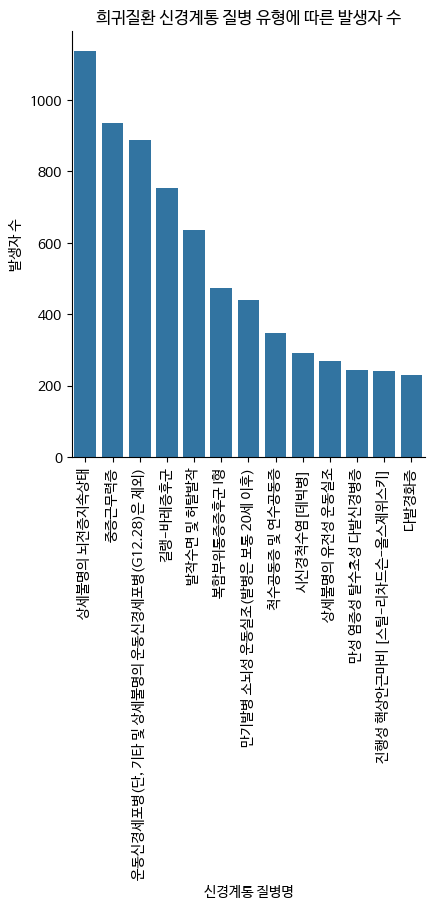

In [59]:
# 데이터프레임을 막대의 길이에 따라 내림차순으로 정렬
df_region_cate_filtered_letter_G_graph = df_region_cate_filtered_letter_G.sort_values(by='발생자 수', ascending=False)

# 희귀질환만 추출한 데이터에서 '신경계통 질병 유형에 따른 발생자 수' 그래프 확인
sns.catplot(data=df_region_cate_filtered_letter_G_graph, x='질병명', y='발생자 수', kind='bar')
plt.title('희귀질환 신경계통 질병 유형에 따른 발생자 수')
plt.xlabel('신경계통 질병명')
plt.xticks(rotation=90)
plt.show()

## 극희귀질환 추출

In [60]:
df_region_cate_filtered_Extreme = df_region_cate.loc[df_region_cate['질환분류'] == '극희귀질환']
df_region_cate_filtered_Extreme = df_region_cate_filtered_Extreme.drop_duplicates()  # 중복 열 제거
df_region_cate_filtered_Extreme

,질환코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음,질환분류
17,G11.9,상세불명의 유전성 운동실조,269,89,14,74,5,11,10,2,0,6,7,9,12,4,8,6,11,1,0,극희귀질환
94,NaN,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",426,107,27,142,10,7,11,7,2,14,22,19,11,4,21,13,4,5,0,극희귀질환


In [61]:
disease_index_94 = df_region_cate_filtered_Extreme.loc[94, '질병명']
disease_index_94

'질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에 따라 KCD 부호를 달리 부여 면역글로블린 G4 관련 질환'

In [62]:
toal_sum_Extreme = df_region_cate_filtered_Extreme['발생자 수'].sum()
toal_sum_Extreme

695

In [63]:
population_accural_Extreme = ((df_region_cate_filtered_Extreme['발생자 수'] / toal_sum_Extreme) * 100).round(2)
population_accural_Extreme

17    38.71
94    61.29
Name: 발생자 수, dtype: float64

In [64]:
# 각 값의 비중 계산 (빈도수 / 전체 합)
population_accural_total = ((df_region_cate_value_counts / df_region_cate_total_sum) * 100).round(2)
population_accural_total
###########################

질환분류
희귀질환     0.12
극희귀질환    0.00
Name: count, dtype: float64

## ☞ 정리
## 1. 희귀질환(42,653명)
1) 내분비,영양(618명) : E27.4 / 부신피질부전NOS
2) 정신및행동(276명) : F01.1 / 카다실
3) 신경계통(6891명) : 질환명 13개 中 Top 5
   * (1) G41.9 / 상세불명의 뇌전증지속상태 / 1137명 (16.5%)
   * (2) G70.0 / 중증근무력증 / 936명 (13.58%)
   * (3) G12.2 / 운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외) / 889명 (12.9%)
   * (4) G61.0 / 길랭-바레증후군 / 754명 (10.94%)
   * (5) G47.4 / 발작수면 및 허탈발작 / 637명 (9.24%)

  
## 2. 극희귀질환 (695명)
1) NaN / 질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된 병태에 따라 KCD 부호를 달리 부여 면역글로블린 G4 관련 질환 / 426명 (61.29%)
2) G11.9(신경계통) / 상세불명의 유전성 운동실조 / 269명 (38.71%)

## 전체 질병계통별 비중 비교

In [65]:
df_region[:5]

,질환코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음
0,계,NaN,43079,8601,2446,11377,1274,1752,1291,1080,238,2431,2243,2762,2120,789,1501,1392,1076,690,16
1,D61.3,특발성 무형성빈혈,406,73,29,101,20,17,9,12,3,24,19,15,22,6,6,20,20,9,1
2,D61.9,저형성빈혈 NOS,223,47,34,56,4,9,2,1,2,21,7,15,11,4,6,2,1,1,0
3,D68.6,항인지질증후군,469,126,27,121,12,20,3,10,1,11,30,13,37,4,13,13,14,14,0
4,D86.0,폐의 사르코이드증,319,79,24,96,5,14,10,4,1,11,12,15,13,5,6,12,9,3,0


In [66]:
df_region_cate_filtered[:5]

,질환코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음,질환분류
0,D61.3,특발성 무형성빈혈,406,73,29,101,20,17,9,12,3,24,19,15,22,6,6,20,20,9,1,희귀질환
1,D61.9,저형성빈혈 NOS,223,47,34,56,4,9,2,1,2,21,7,15,11,4,6,2,1,1,0,희귀질환
4,D68.6,항인지질증후군,469,126,27,121,12,20,3,10,1,11,30,13,37,4,13,13,14,14,0,희귀질환
5,D86.0,폐의 사르코이드증,319,79,24,96,5,14,10,4,1,11,12,15,13,5,6,12,9,3,0,희귀질환
6,E27.4,부신피질부전 NOS,618,75,81,90,9,67,15,16,3,42,48,56,27,35,15,18,10,11,0,희귀질환


In [67]:
df_region_cate_filtered_Extreme

,질환코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음,질환분류
17,G11.9,상세불명의 유전성 운동실조,269,89,14,74,5,11,10,2,0,6,7,9,12,4,8,6,11,1,0,극희귀질환
94,NaN,"질병의 특성상 다양한 장기에, 다양한 병변이 발생되는 질환으로, 진단을 통해 확인된...",426,107,27,142,10,7,11,7,2,14,22,19,11,4,21,13,4,5,0,극희귀질환


In [91]:
# 희귀질환을 기준으로 groupby하여 count
grouped_filtered = df_region_cate_filtered.groupby('질환코드')['발생자 수'].sum().reset_index()
grouped_filtered = grouped_filtered.sort_values('발생자 수', ascending=False)
grouped_filtered

,질환코드,발생자 수
27,J84.1,4450
22,I42.0,3092
36,M32.1,2967
30,K50.8,2347
39,M35.0,2296
25,I67.5,2169
24,I42.20,1656
19,H18.6,1495
28,K50.0,1211
12,G41.9,1137


In [92]:
# '질환코드' 열에서 첫 번째 알파벳 추출
grouped_filtered['질환알파벳코드'] = grouped_filtered['질환코드'].str[0]
grouped_filtered

,질환코드,발생자 수,질환알파벳코드
27,J84.1,4450,J
22,I42.0,3092,I
36,M32.1,2967,M
30,K50.8,2347,K
39,M35.0,2296,M
25,I67.5,2169,I
24,I42.20,1656,I
19,H18.6,1495,H
28,K50.0,1211,K
12,G41.9,1137,G


In [ ]:
# 파이차트 그리기
plt.figure(figsize=(8, 8))
pie = plt.pie(grouped['발생자 수'], labels=grouped['질환계통'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('2021년 희귀질환 질병계통별 발생자수 \n')
plt.show()

## 희귀질환정보_항목분류 데이터(확인용)

In [ ]:
df_cate = pd.read_csv('../../New_csv(데이터전처리 완료된 csv)/희귀질환정보_항목분류.csv')
df_cate

In [69]:
def codes(x):
    try :
        condition = (df_cate["질환코드"] == x[0]) &\
               (float(x[1:]) >= df_cate["코드시작"].astype(float)) &\
               (float(x[1:]) <= df_cate["코드끝"].astype(float))
        result = df_cate.loc[condition, '항목분류']
        if len(result) > 0:
            return result.iloc[0]
        else:
            return None  # 여기서 None 대신 원하는 기본값을 사용하십시오.
    except:
        return None

In [70]:
df_region_cate_filtered['질환계통'] = df_region_cate_filtered['질환코드'].apply(codes)

/tmp/ipykernel_99634/682959372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region_cate_filtered['질환계통'] = df_region_cate_filtered['질환코드'].apply(codes)


In [71]:
df_region_cate_filtered.reset_index()

,index,질환코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음,질환분류,질환계통
0,0,D61.3,특발성 무형성빈혈,406,73,29,101,20,17,9,12,3,24,19,15,22,6,6,20,20,9,1,희귀질환,혈액조혈기관
1,1,D61.9,저형성빈혈 NOS,223,47,34,56,4,9,2,1,2,21,7,15,11,4,6,2,1,1,0,희귀질환,혈액조혈기관
2,4,D68.6,항인지질증후군,469,126,27,121,12,20,3,10,1,11,30,13,37,4,13,13,14,14,0,희귀질환,혈액조혈기관
3,5,D86.0,폐의 사르코이드증,319,79,24,96,5,14,10,4,1,11,12,15,13,5,6,12,9,3,0,희귀질환,혈액조혈기관
4,6,E27.4,부신피질부전 NOS,618,75,81,90,9,67,15,16,3,42,48,56,27,35,15,18,10,11,0,희귀질환,"내분비,영양"
5,10,F01.1,카다실,276,43,6,43,2,7,1,4,4,8,12,17,15,16,6,2,0,90,0,희귀질환,정신및행동
6,11,G11.2,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),440,62,22,103,3,15,22,12,4,41,33,27,26,10,14,20,19,7,0,희귀질환,신경계통질환
7,12,G11.9,상세불명의 유전성 운동실조,269,89,14,74,5,11,10,2,0,6,7,9,12,4,8,6,11,1,0,희귀질환,신경계통질환
8,18,G12.2,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",889,171,44,216,31,45,25,20,6,53,52,68,43,16,44,24,17,14,0,희귀질환,신경계통질환
9,19,G23.1,진행성 핵상안근마비 [스틸-리차드슨-올스제위스키],242,64,14,58,6,11,9,4,2,9,14,16,14,3,5,7,4,2,0,희귀질환,신경계통질환


In [80]:
df_region_cate_filtered['발생자 수'].sum()

42653

In [73]:
df_region_cate_filtered

,질환코드,질병명,발생자 수,서울특별시,인천광역시,경기도,강원도,충청남도,충청북도,대전광역시,세종특별자치시,경상남도,경상북도,부산광역시,대구광역시,울산광역시,전라북도,전라남도,광주광역시,제주특별자치도,알수없음,질환분류,질환계통
0,D61.3,특발성 무형성빈혈,406,73,29,101,20,17,9,12,3,24,19,15,22,6,6,20,20,9,1,희귀질환,혈액조혈기관
1,D61.9,저형성빈혈 NOS,223,47,34,56,4,9,2,1,2,21,7,15,11,4,6,2,1,1,0,희귀질환,혈액조혈기관
4,D68.6,항인지질증후군,469,126,27,121,12,20,3,10,1,11,30,13,37,4,13,13,14,14,0,희귀질환,혈액조혈기관
5,D86.0,폐의 사르코이드증,319,79,24,96,5,14,10,4,1,11,12,15,13,5,6,12,9,3,0,희귀질환,혈액조혈기관
6,E27.4,부신피질부전 NOS,618,75,81,90,9,67,15,16,3,42,48,56,27,35,15,18,10,11,0,희귀질환,"내분비,영양"
10,F01.1,카다실,276,43,6,43,2,7,1,4,4,8,12,17,15,16,6,2,0,90,0,희귀질환,정신및행동
11,G11.2,만기발병 소뇌성 운동실조(발병은 보통 20세 이후),440,62,22,103,3,15,22,12,4,41,33,27,26,10,14,20,19,7,0,희귀질환,신경계통질환
12,G11.9,상세불명의 유전성 운동실조,269,89,14,74,5,11,10,2,0,6,7,9,12,4,8,6,11,1,0,희귀질환,신경계통질환
18,G12.2,"운동신경세포병(단, 기타 및 상세불명의 운동신경세포병(G12.28)은 제외)",889,171,44,216,31,45,25,20,6,53,52,68,43,16,44,24,17,14,0,희귀질환,신경계통질환
19,G23.1,진행성 핵상안근마비 [스틸-리차드슨-올스제위스키],242,64,14,58,6,11,9,4,2,9,14,16,14,3,5,7,4,2,0,희귀질환,신경계통질환


In [74]:
# 질환항목분류를 기준으로 groupby하여 count
grouped = df_region_cate_filtered.groupby('질환계통')['발생자 수'].sum().reset_index()
grouped = grouped.sort_values('발생자 수', ascending=False)
grouped

,질환계통,발생자 수
0,근육골격계통,8767
5,순환기계통,7904
6,신경계통질환,6891
4,소화기계통,6105
10,호흡기계통,4450
3,선천기형변형,2950
2,눈및부속기관,2593
9,혈액조혈기관,1417
8,피부및조직,682
1,"내분비,영양",618


## '희귀질환' 질환계통별 발생자 수 분포도 확인

In [79]:
# 항목분류 dataframe 생성
col1 = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', '코드없음']
col2 = ['특정감염성', '신생물', '혈액조혈기관', '내분비및영양', '정신및행동', '신경계통질환', '눈및부속기관', '순환기계통', '호흡기계통', '소화기계통', '피부및조직', '근육골격계통', '비뇨생식', '출생전후기', '선천기형변형', '코드없음']

df_alphabet = pd.DataFrame({
    '분류기호': col1,
    '분류명': col2
})

df_alphabet

,분류기호,분류명
0,A,특정감염성
1,C,신생물
2,D,혈액조혈기관
3,E,내분비및영양
4,F,정신및행동
5,G,신경계통질환
6,H,눈및부속기관
7,I,순환기계통
8,J,호흡기계통
9,K,소화기계통


In [95]:
# grouped_filtered와 df_alphabet concat
df_merged_alphabet = pd.merge(grouped_filtered, df_alphabet, left_on='질환알파벳코드', right_on='분류기호', how='left')
df_merged_alphabet

,질환코드,발생자 수,질환알파벳코드,분류기호,분류명
0,J84.1,4450,J,J,호흡기계통
1,I42.0,3092,I,I,순환기계통
2,M32.1,2967,M,M,근육골격계통
3,K50.8,2347,K,K,소화기계통
4,M35.0,2296,M,M,근육골격계통
5,I67.5,2169,I,I,순환기계통
6,I42.20,1656,I,I,순환기계통
7,H18.6,1495,H,H,눈및부속기관
8,K50.0,1211,K,K,소화기계통
9,G41.9,1137,G,G,신경계통질환


In [100]:
# '분류명'으로 그룹화하고, '발생자 수'를 합산
df_merged_alphabet_grouped = df_merged_alphabet.groupby('분류명')['발생자 수'].sum().reset_index()
df_merged_alphabet_grouped

,분류명,발생자 수
0,근육골격계통,8767
1,내분비및영양,618
2,눈및부속기관,2593
3,선천기형변형,2950
4,소화기계통,6105
5,순환기계통,7904
6,신경계통질환,6891
7,정신및행동,276
8,피부및조직,682
9,혈액조혈기관,1417


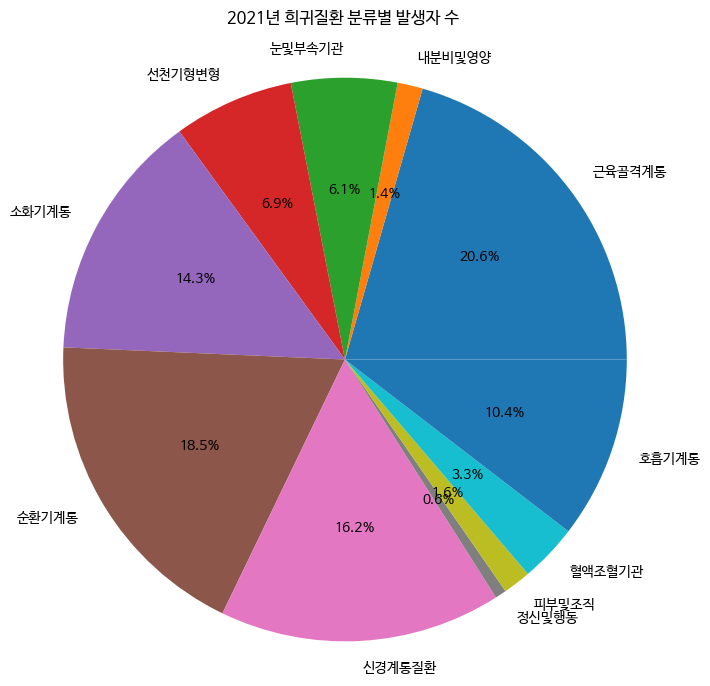

In [103]:
# 파이차트 그리기
plt.figure(figsize=(8, 8))
pie = plt.pie(df_merged_alphabet_grouped['발생자 수'], labels=df_merged_alphabet_grouped['분류명'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('2021년 희귀질환 분류별 발생자 수 \n')
plt.show()